<b>Tomato Leaf Disease Prediction using VGG16</b><br>
--
AUTHOR : 
* <a href="github.com/samyon7">samyon7</a>
* <a href="github.com/Yehezk34">Yehezk34</a>

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d jarvis705/tomato-leaf-disease

 97% 312M/322M [00:04<00:00, 69.9MB/s]
100% 322M/322M [00:04<00:00, 76.8MB/s]


In [6]:
import numpy as np
import itertools
import os
import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('tomato-leaf-disease.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [9]:
train_path = "files/Tomato Leaf Diseases/Training Set"
valid_path = "files/Tomato Leaf Diseases/Validation Set"

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

In [11]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 200,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [13]:
validation_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7000 images belonging to 10 classes.


In [14]:
# Use the VGG16!
vgg16_model =  tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [15]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [16]:
for layer in model.layers:
    layer.trainable = False

In [17]:
model.add(Dense(units=10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [22]:
# Epochs should be 50

mod = model.fit(x = training_set, validation_data=validation_set, epochs=20, verbose = 1)

Epoch 1/20
50/50 [==============================] - 143s 3s/step - loss: 1.0432 - accuracy: 0.6679 - val_loss: 1.0826 - val_accuracy: 0.6483
Epoch 2/20
50/50 [==============================] - 143s 3s/step - loss: 0.9922 - accuracy: 0.6770 - val_loss: 1.0258 - val_accuracy: 0.6726
Epoch 3/20
50/50 [==============================] - 144s 3s/step - loss: 0.9550 - accuracy: 0.6928 - val_loss: 1.0264 - val_accuracy: 0.6694
Epoch 4/20
50/50 [==============================] - 143s 3s/step - loss: 0.9216 - accuracy: 0.7009 - val_loss: 0.9661 - val_accuracy: 0.6933
Epoch 5/20
50/50 [==============================] - 143s 3s/step - loss: 0.9037 - accuracy: 0.7074 - val_loss: 0.9924 - val_accuracy: 0.6804
Epoch 6/20
50/50 [==============================] - 143s 3s/step - loss: 0.8955 - accuracy: 0.7067 - val_loss: 0.9208 - val_accuracy: 0.7073
Epoch 7/20
50/50 [==============================] - 143s 3s/step - loss: 0.8562 - accuracy: 0.7240 - val_loss: 0.9173 - val_accuracy: 0.7093
Epoch 8/20
50

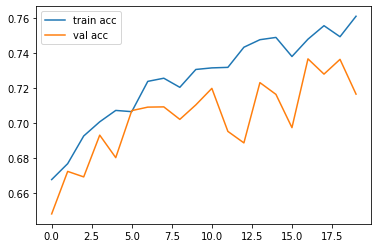

In [24]:
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

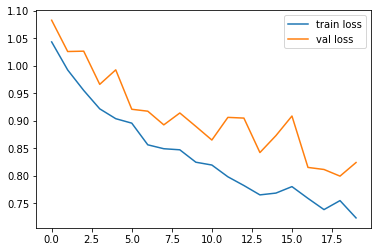

In [25]:
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [27]:
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")